#### Umut Aksu - 202290202

#### (i)                  train a CNN model from scratch and learn how to tune the hyperparameters and visualise filters

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "inaturalist_12K/train/"
val_dir = "inaturalist_12K/val/"
img_height, img_width = 150, 150
batch_size = 32

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Excalibur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,116,384 (217.88 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,077,590 (145.25 MB)

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=2
)

model.save('cnn_model_inaturalist.h5')

Epoch 1/10
313/313 - 136s - 433ms/step - accuracy: 0.2119 - loss: 2.1631 - val_accuracy: 0.2445 - val_loss: 2.0671
Epoch 2/10
313/313 - 113s - 361ms/step - accuracy: 0.2626 - loss: 2.0552 - val_accuracy: 0.2875 - val_loss: 2.0468
Epoch 3/10
313/313 - 112s - 358ms/step - accuracy: 0.2867 - loss: 1.9983 - val_accuracy: 0.3245 - val_loss: 1.9546
Epoch 4/10
313/313 - 112s - 357ms/step - accuracy: 0.3011 - loss: 1.9604 - val_accuracy: 0.3170 - val_loss: 1.9329
Epoch 5/10
313/313 - 112s - 358ms/step - accuracy: 0.3206 - loss: 1.9219 - val_accuracy: 0.3375 - val_loss: 1.9080
Epoch 6/10
313/313 - 112s - 356ms/step - accuracy: 0.3243 - loss: 1.8944 - val_accuracy: 0.3370 - val_loss: 1.9220
Epoch 7/10
313/313 - 112s - 359ms/step - accuracy: 0.3348 - loss: 1.8870 - val_accuracy: 0.3340 - val_loss: 1.9526
Epoch 8/10
313/313 - 112s - 357ms/step - accuracy: 0.3427 - loss: 1.8576 - val_accuracy: 0.3375 - val_loss: 1.9918
Epoch 9/10
313/313 - 112s - 358ms/step - accuracy: 0.3545 - loss: 1.8233 - val_a

In [11]:
model.save('cnn_model_inaturalist.h5')

In [93]:
model = tf.keras.models.load_model('cnn_model_inaturalist.h5')

In [70]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    class_names = train_generator.class_indices
    class_names = dict((v,k) for k,v in class_names.items())
    print("Predicted class:", class_names[predicted_class[0]])

    plt.imshow(img)
    plt.title(f"Predicted class: {class_names[predicted_class[0]]}")
    plt.axis('off')
    plt.show()


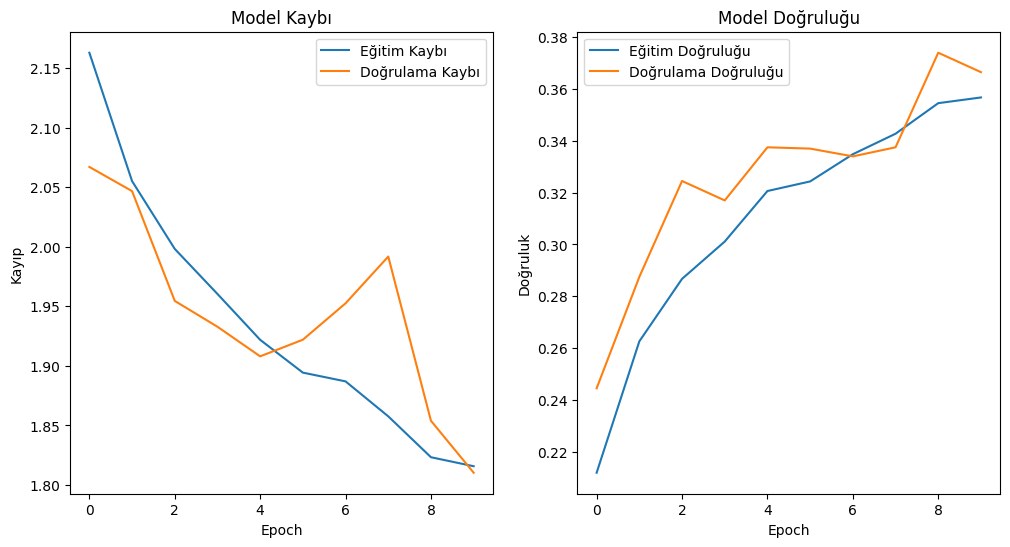

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend()

plt.show()

##### ----- Prediction ------------------------------------------------

Picture 1: Fungi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted class: Mammalia


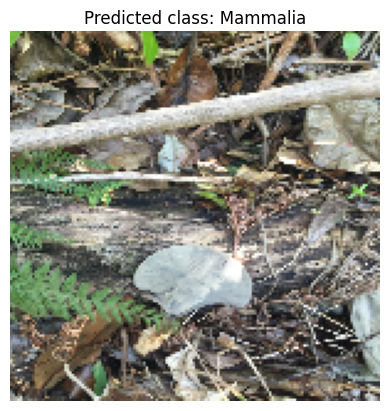

In [94]:
print("Picture 1: Fungi")       # 1.jpg orjinal classı
predict_image("test_pic/1.jpg") # 1.jpg tahmin edilen classı

Picture 2: Mammalia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: Mammalia


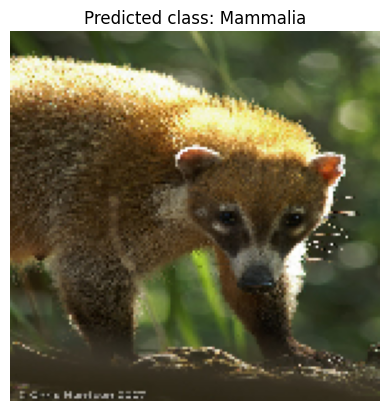

In [95]:
print("Picture 2: Mammalia")    # 2.jpg orjinal classı
predict_image("test_pic/2.jpg") # 2.jpg tahmin edilen classı

Picture 3: Reptilia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Animalia


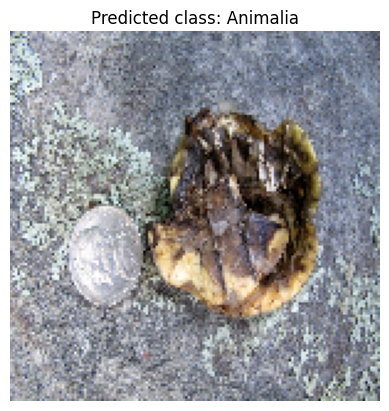

In [96]:
print("Picture 3: Reptilia")    # 3.jpg orjinal classı
predict_image("test_pic/3.jpg") # 3.jpg tahmin edilen classı

Picture 4: Amphibia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Insecta


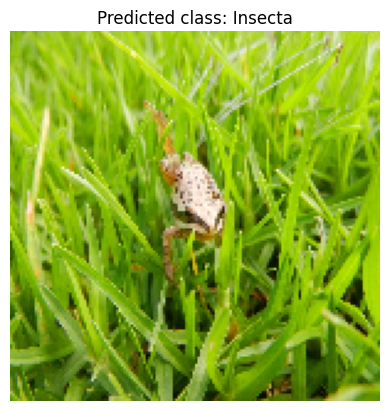

In [97]:
print("Picture 4: Amphibia")    # 4.jpg orjinal classı
predict_image("test_pic/4.jpg") # 4.jpg tahmin edilen classı

Picture 5: Amphibia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Insecta


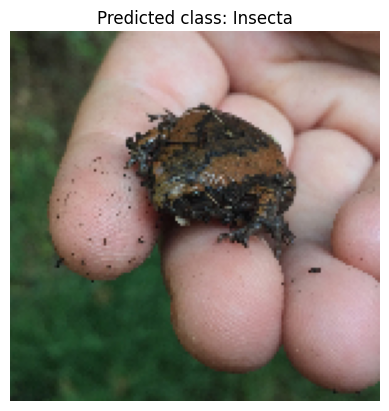

In [98]:
print("Picture 5: Amphibia")    # 5.jpg orjinal classı
predict_image("test_pic/5.jpg") # 5.jpg tahmin edilen classı

Picture 6: Aves
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: Aves


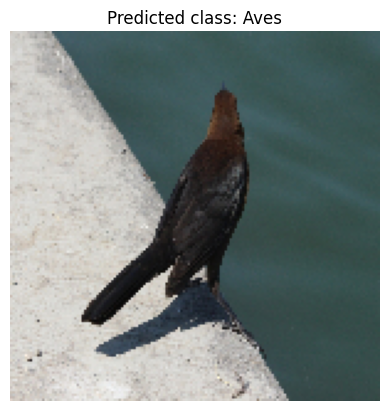

In [99]:
print("Picture 6: Aves")        # 6.jpg orjinal classı
predict_image("test_pic/6.jpg") # 6.jpg tahmin edilen classı

Picture 7: Aves
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Aves


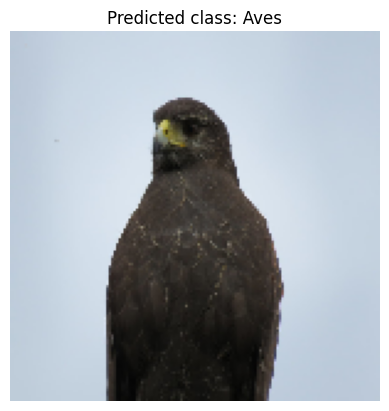

In [100]:
print("Picture 7: Aves")        # 7.jpg orjinal classı
predict_image("test_pic/7.jpg") # 7.jpg tahmin edilen classı

Picture 8: Plantae
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Plantae


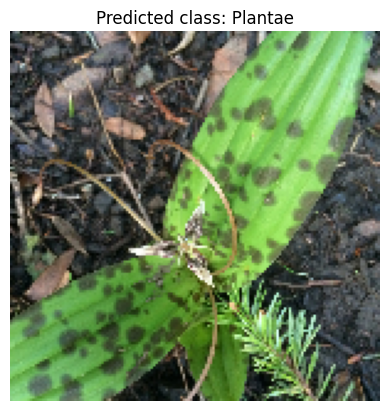

In [101]:
print("Picture 8: Plantae")     # 8.jpg orjinal classı
predict_image("test_pic/8.jpg") # 8.jpg tahmin edilen classı

Picture 9: Plantae
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Plantae


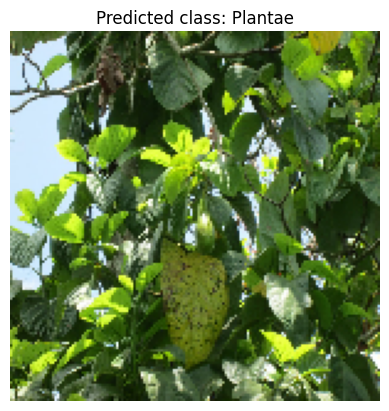

In [102]:
print("Picture 9: Plantae")    # 9.jpg orjinal classı
predict_image("test_pic/9.jpg") # 9.jpg tahmin edilen classı

Picture 10: Mollusca
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Mollusca


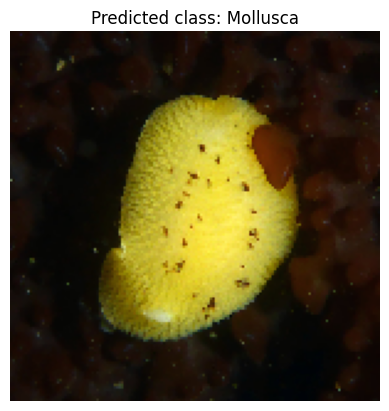

In [103]:
print("Picture 10: Mollusca")   # 10.jpg orjinal classı
predict_image("test_pic/10.jpg")    # 10.jpg tahmin edilen classı

#### (ii)                  finetune a pre-trained model just as you would do in many real world applications

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 51s 1us/step


In [55]:
from tensorflow.keras import layers, models

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    verbose=2
)

Epoch 1/5
313/313 - 359s - 1s/step - accuracy: 0.2537 - loss: 2.1260 - val_accuracy: 0.3785 - val_loss: 1.8310
Epoch 2/5
313/313 - 363s - 1s/step - accuracy: 0.3051 - loss: 1.9279 - val_accuracy: 0.4010 - val_loss: 1.7154
Epoch 3/5
313/313 - 366s - 1s/step - accuracy: 0.3250 - loss: 1.8709 - val_accuracy: 0.4000 - val_loss: 1.7018
Epoch 4/5
313/313 - 362s - 1s/step - accuracy: 0.3436 - loss: 1.8479 - val_accuracy: 0.4210 - val_loss: 1.6471
Epoch 5/5
313/313 - 360s - 1s/step - accuracy: 0.3573 - loss: 1.8199 - val_accuracy: 0.4225 - val_loss: 1.6709


In [57]:
model.save('fine_tuned_vgg16_model.h5')

In [82]:
model = tf.keras.models.load_model('fine_tuned_vgg16_model.h5')

#### (iii)                use an existing pre-trained model for a cool application

Picture 1: Fungi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Mammalia


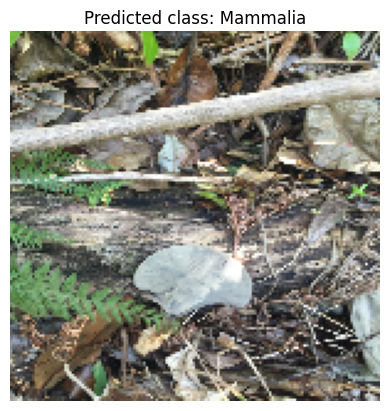

In [104]:
print("Picture 1: Fungi")    # 1.jpg orjinal classı
predict_image("test_pic/1.jpg") # 1.jpg tahmin edilen classı

Picture 2: Mammalia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Mammalia


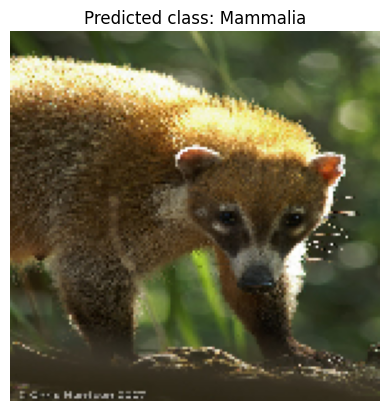

In [105]:
print("Picture 2: Mammalia")    # 2.jpg orjinal classı
predict_image("test_pic/2.jpg") # 2.jpg tahmin edilen classı

Picture 3: Reptilia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Animalia


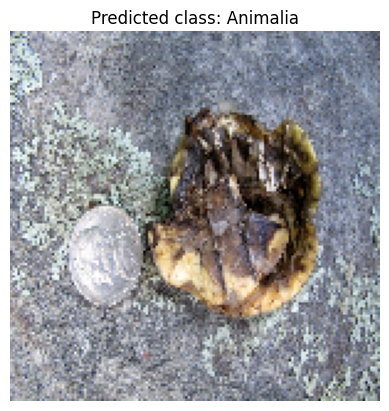

In [106]:
print("Picture 3: Reptilia")    # 3.jpg orjinal classı
predict_image("test_pic/3.jpg") # 3.jpg tahmin edilen classı

Picture 4: Amphibia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Predicted class: Insecta


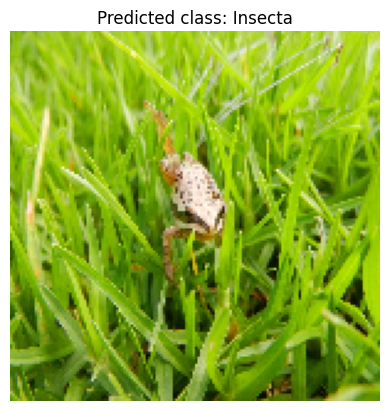

In [107]:
print("Picture 4: Amphibia")    # 4.jpg orjinal classı
predict_image("test_pic/4.jpg") # 4.jpg tahmin edilen classı

Picture 5: Amphibia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Insecta


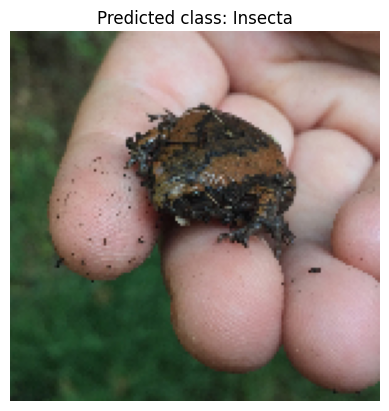

In [108]:
print("Picture 5: Amphibia")    # 5.jpg orjinal classı
predict_image("test_pic/5.jpg") # 5.jpg tahmin edilen classı

Picture 6: Aves
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: Aves


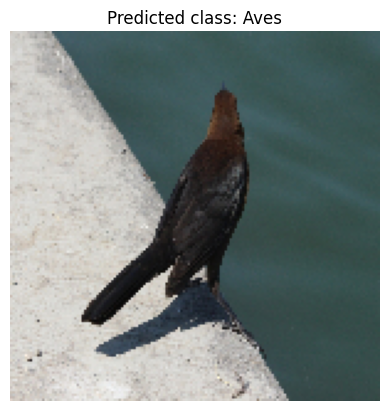

In [109]:
print("Picture 6: Aves")    # 6.jpg orjinal classı
predict_image("test_pic/6.jpg") # 6.jpg tahmin edilen classı

Picture 7: Aves
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted class: Aves


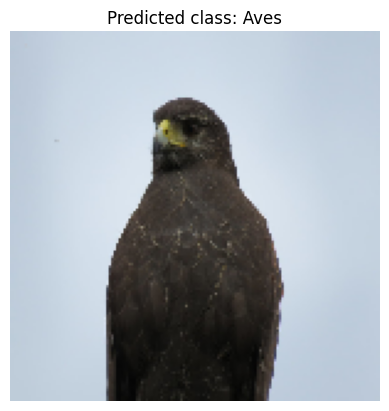

In [110]:
print("Picture 7: Aves")    # 7.jpg orjinal classı
predict_image("test_pic/7.jpg") # 7.jpg tahmin edilen classı

Picture 8: Plantae
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Plantae


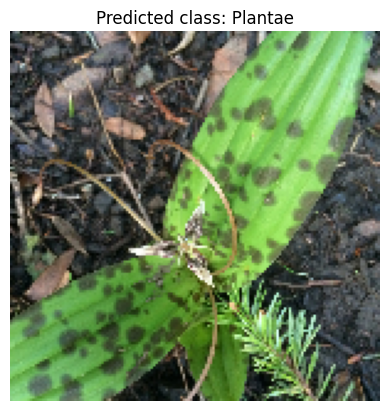

In [111]:
print("Picture 8: Plantae")   # 8.jpg orjinal classı
predict_image("test_pic/8.jpg") # 8.jpg tahmin edilen classı

Picture 9: Plantae
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Predicted class: Plantae


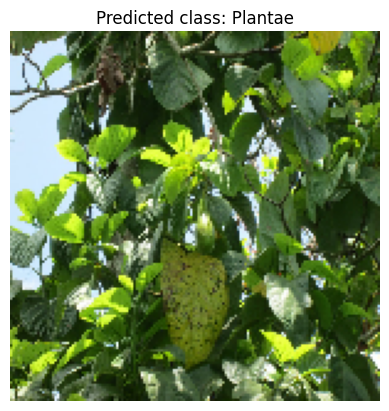

In [112]:
print("Picture 9: Plantae")   # 9.jpg orjinal classı
predict_image("test_pic/9.jpg") # 9.jpg tahmin edilen classı

Picture 10: Mollusca
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Mollusca


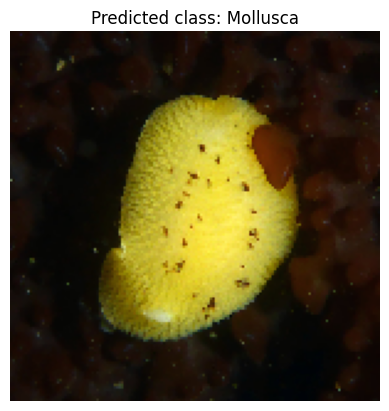

In [113]:
print("Picture 10: Mollusca")   # 10.jpg orjinal classı
predict_image("test_pic/10.jpg")    # 10.jpg tahmin edilen classı